The next thing to work on here is to make a few useful plots. These are the main ones that come to mind

1. seqlogo
2. wtScore line plot
3. n_effective barplot
4. aa_correlation heatmap

I think I'll have these set up to be a separate module `berteome_plot`, and all functions would take berteome output as input (i.e. `berteome_plot.seqlogo(berteome)`)

In [71]:
!pip uninstall berteome
!pip install "berteome @ git+https://github.com/tijeco/berteome@16adb83094cf249aff326e814589d0010ae1101f"

Found existing installation: berteome 0.1.5
Uninstalling berteome-0.1.5:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/berteome-0.1.5.dist-info/*
    /usr/local/lib/python3.8/dist-packages/berteome/*
Proceed (Y/n)? y
  Successfully uninstalled berteome-0.1.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tijeco/berteome (to revision 16adb83094cf249aff326e814589d0010ae1101f) to /tmp/pip-install-gtb4cjoe/berteome_c30549a294084098ab17a9c35f7a2182
  Running command git clone --filter=blob:none --quiet https://github.com/tijeco/berteome /tmp/pip-install-gtb4cjoe/berteome_c30549a294084098ab17a9c35f7a2182
  Running command git rev-parse -q --verify 'sha^16adb83094cf249aff326e814589d0010ae1101f'
  Running command git fetch -q https://github.com/tijeco/berteome 16adb83094cf249aff326e814589d0010ae1101f
  Running command git checkout -q 16adb83094cf249aff326e814589d0010ae1101f
  Resolved https://github.c

# Seqlogo

Seqlogo has some weird dependencies that need to be installed on colab. I'm pretty sure they could be wrapped up in a conda environment though..

In [1]:
!pip install seqlogo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!apt install ghostscript

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ghostscript is already the newest version (9.26~dfsg+0-0ubuntu0.18.04.17).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


In [3]:
!apt-get install -y pdf2svg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pdf2svg is already the newest version (0.2.3-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


In [1]:
from berteome import berteome
import seqlogo

In [2]:
berteome_models = berteome.modelLoader()
bert_tokenizer, bert_model = berteome_models.load_model("Rostlab/prot_bert")
mendel_berteome = berteome.modelPredDF("MENDEL",bert_tokenizer, bert_model)

Some weights of the model checkpoint at Rostlab/prot_bert were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [3]:
mendel_berteome_aas = mendel_berteome.df[list(mendel_berteome.aas)]
mendel_berteome_seqlogoPPM = seqlogo.Ppm(mendel_berteome_aas,alphabet_type = "AA")
mendel_berteome_seqlogoPPM 

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,0.036697,0.011504,0.048245,0.118906,0.024072,0.039202,0.012621,0.066498,0.107769,0.072495,0.076602,0.072661,0.024722,0.038672,0.043105,0.070280,0.056544,0.049927,0.007781,0.021699
1,0.045721,0.015662,0.041921,0.074830,0.037153,0.044325,0.018264,0.073077,0.104815,0.106501,0.043581,0.062667,0.025277,0.036911,0.055543,0.064425,0.049955,0.056789,0.012691,0.029893
2,0.043564,0.009685,0.162590,0.184364,0.033782,0.044661,0.012355,0.052630,0.035023,0.097427,0.041484,0.041990,0.019992,0.025515,0.029433,0.048106,0.030303,0.054742,0.007430,0.024924
3,0.042083,0.013244,0.049748,0.086194,0.039736,0.055911,0.016861,0.073296,0.091365,0.109088,0.040080,0.060822,0.032024,0.039689,0.046228,0.062323,0.044901,0.058937,0.010875,0.026596
4,0.046641,0.018770,0.079822,0.086915,0.050638,0.050466,0.022397,0.074501,0.064585,0.090807,0.028962,0.062234,0.023879,0.030534,0.040489,0.065195,0.044938,0.068038,0.012156,0.038034
5,0.038191,0.009217,0.065189,0.152547,0.020950,0.049525,0.013955,0.064596,0.109141,0.060736,0.040042,0.096484,0.020712,0.035022,0.046888,0.049071,0.046247,0.048276,0.010486,0.022727


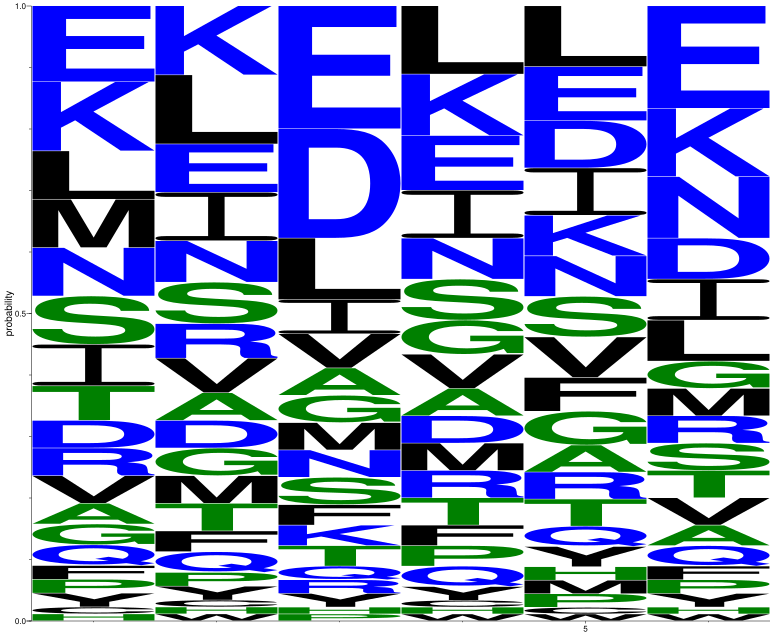

In [4]:
seqlogo.seqlogo(mendel_berteome_seqlogoPPM ,ic_scale = False, format = 'svg', size = 'xlarge')

In [5]:
def seqlogo_plot(berteome, ic_scale = False, format = 'svg', size = 'xlarge'):
  berteome_aas = berteome.df[list(berteome.aas)]
  berteome_seqlogoPPM = seqlogo.Ppm(berteome_aas,alphabet_type = "AA")
  return seqlogo.seqlogo(berteome_seqlogoPPM ,ic_scale = ic_scale, format = format, size = size)

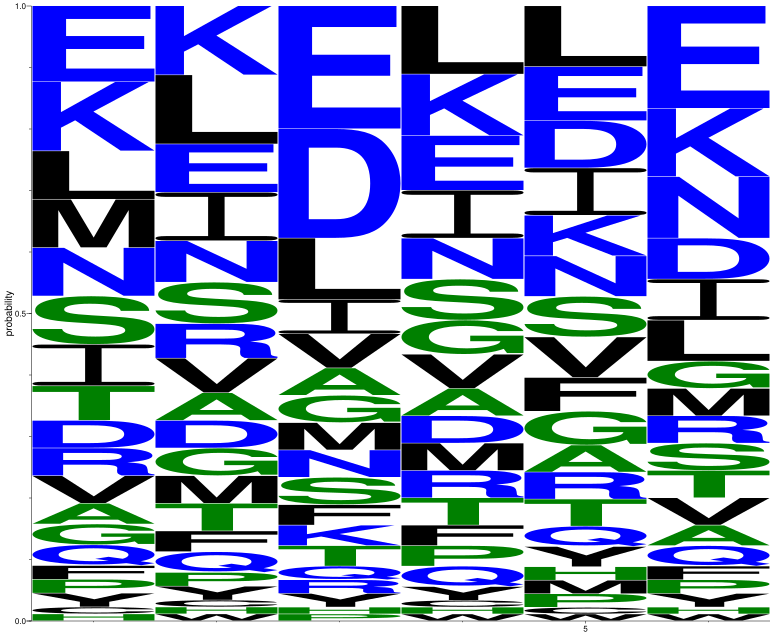

In [6]:
seqlogo_plot(mendel_berteome)

# wtScore line plot

In [7]:
import matplotlib.pyplot as plt

In [8]:
mendel_berteome.df

,wt,wtIndex,wtScore,n_effective,topAA,topAAscore,A,C,D,E,...,M,N,P,Q,R,S,T,V,W,Y
0,M,1,0.076602,16.680519,E,0.118906,0.036697,0.011504,0.048245,0.118906,...,0.076602,0.072661,0.024722,0.038672,0.043105,0.070280,0.056544,0.049927,0.007781,0.021699
1,E,2,0.074830,17.599154,L,0.106501,0.045721,0.015662,0.041921,0.074830,...,0.043581,0.062667,0.025277,0.036911,0.055543,0.064425,0.049955,0.056789,0.012691,0.029893
2,N,3,0.041990,14.518531,E,0.184364,0.043564,0.009685,0.162590,0.184364,...,0.041484,0.041990,0.019992,0.025515,0.029433,0.048106,0.030303,0.054742,0.007430,0.024924
3,D,4,0.049748,17.561047,L,0.109088,0.042083,0.013244,0.049748,0.086194,...,0.040080,0.060822,0.032024,0.039689,0.046228,0.062323,0.044901,0.058937,0.010875,0.026596
4,E,5,0.086915,17.921406,L,0.090807,0.046641,0.018770,0.079822,0.086915,...,0.028962,0.062234,0.023879,0.030534,0.040489,0.065195,0.044938,0.068038,0.012156,0.038034
5,L,6,0.060736,16.068075,E,0.152547,0.038191,0.009217,0.065189,0.152547,...,0.040042,0.096484,0.020712,0.035022,0.046888,0.049071,0.046247,0.048276,0.010486,0.022727


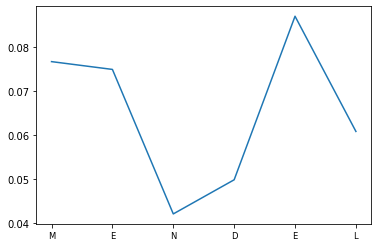

In [9]:
plt.plot(mendel_berteome.df["wtIndex"],mendel_berteome.df["wtScore"])
plt.xticks(mendel_berteome.df["wtIndex"], mendel_berteome.df["wt"], size='small')

plt.show()

In [10]:
def wtScore_plot(berteome):
  fig, ax = plt.subplots()

  ax.plot(berteome.df.index,berteome.df["wtScore"])
  ax.set_xticks(berteome.df.index)
  ax.set_xticklabels(berteome.df["wt"])
  
  return fig, ax

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7d820c31f0>)

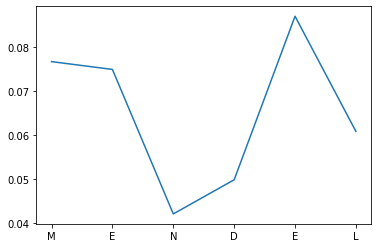

In [11]:
wtScore_plot(mendel_berteome)


In [12]:
mendel_berteome.df.index

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

[Text(0, 0, 'A'), Text(0, 0, 'B'), Text(0, 0, 'C'), Text(0, 0, 'D')]

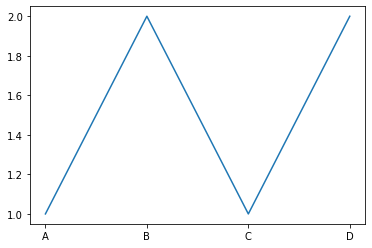

In [13]:
fig, ax = plt.subplots()
ax.plot([1,2,3,4],[1,2,1,2])
# ax.set_xticklabels(["A","B","C","D"])
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(["A","B","C","D"])

# Bar graph of n_effective

In [18]:
def n_effective_plot(berteome):
  fig, ax = plt.subplots()

  ax.bar(berteome.df.index,berteome.df["n_effective"])
  ax.set_xticks(berteome.df.index)
  ax.set_xticklabels(berteome.df["wt"])
  
  return fig, ax

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7d81c3fa90>)

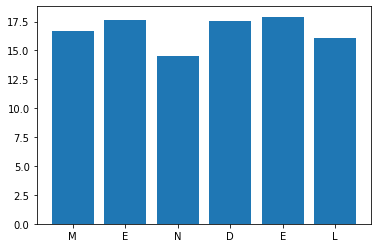

In [19]:
n_effective_plot(mendel_berteome)

# Correlation heatmap

In [21]:
import seaborn as sb

In [20]:
mendel_berteome.aa_correlation()

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
A,1.000000,0.728715,0.235810,-0.389880,0.879478,0.295939,0.745629,0.281994,-0.521591,0.733512,-0.720194,-0.611639,0.079973,-0.433475,-0.010752,0.051076,-0.411044,0.833235,0.585926,0.854028
C,0.728715,1.000000,-0.335086,-0.816555,0.854112,0.231240,0.948531,0.774243,-0.042334,0.466360,-0.382031,-0.235096,0.369489,0.063834,0.313217,0.638680,0.247711,0.876376,0.736407,0.923179
D,0.235810,-0.335086,1.000000,0.765980,0.084237,-0.105943,-0.311785,-0.822663,-0.909457,0.087421,-0.275042,-0.581996,-0.599214,-0.924922,-0.890910,-0.671449,-0.903984,0.053589,-0.545103,-0.021774
E,-0.389880,-0.816555,0.765980,1.000000,-0.555584,-0.275365,-0.756599,-0.960437,-0.445062,-0.449607,0.096590,-0.027763,-0.732526,-0.612387,-0.710517,-0.797275,-0.600745,-0.555534,-0.767346,-0.570185
F,0.879478,0.854112,0.084237,-0.555584,1.000000,0.456554,0.850721,0.485917,-0.477467,0.699526,-0.622552,-0.579098,0.359107,-0.254099,-0.072739,0.316781,-0.244826,0.988906,0.546931,0.916871
G,0.295939,0.231240,-0.105943,-0.275365,0.456554,1.000000,0.469717,0.397913,-0.077729,0.311335,-0.730916,0.058536,0.495873,0.101611,0.103227,-0.197846,-0.268709,0.464575,0.501189,0.351613
H,0.745629,0.948531,-0.311785,-0.756599,0.850721,0.469717,1.000000,0.780563,-0.042422,0.403466,-0.613977,-0.096189,0.331730,0.020781,0.334186,0.428619,0.133945,0.884543,0.852824,0.949147
I,0.281994,0.774243,-0.822663,-0.960437,0.485917,0.397913,0.780563,1.000000,0.529266,0.250584,-0.168636,0.251695,0.680964,0.638904,0.732240,0.718683,0.641502,0.519188,0.816000,0.560873
K,-0.521591,-0.042334,-0.909457,-0.445062,-0.477467,-0.077729,-0.042422,0.529266,1.000000,-0.363205,0.430718,0.773594,0.335643,0.889435,0.850884,0.411444,0.872260,-0.447166,0.317516,-0.325412
L,0.733512,0.466360,0.087421,-0.449607,0.699526,0.311335,0.403466,0.250584,-0.363205,1.000000,-0.360750,-0.779562,0.554163,-0.037801,0.062683,0.196178,-0.320043,0.588138,0.326964,0.436263


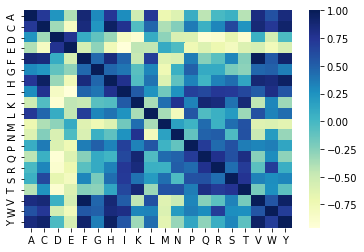

In [23]:
dataplot = sb.heatmap(mendel_berteome.aa_correlation(), cmap="YlGnBu")

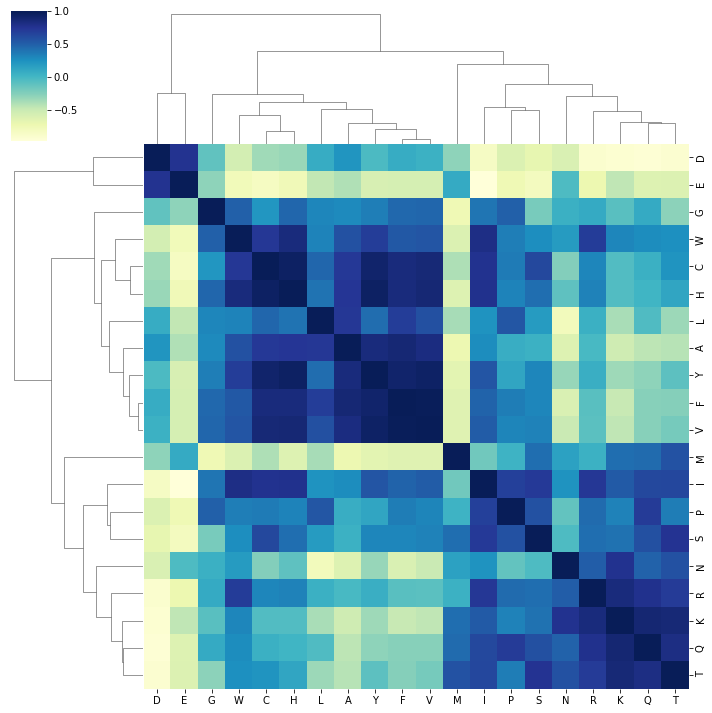

In [24]:
dataplot = sb.clustermap(mendel_berteome.aa_correlation(), cmap="YlGnBu")

Yeah, I like that quite a lot! That's probably sufficient for now, but ideally there would be some labeling (either in a custom way or at least by basic biochemical properties)

In [25]:
def aa_correlation_plot(berteome):
  return sb.clustermap(berteome.aa_correlation(), cmap="YlGnBu")

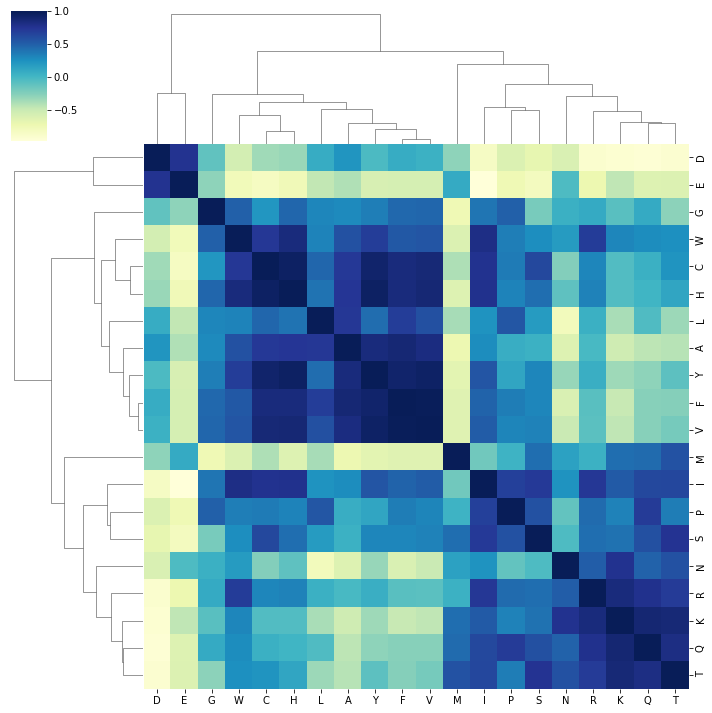

In [26]:
aa_correlation_plot(mendel_berteome)